# Keras eksempel med tilfældige data

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD

# Generate dummy data
import numpy as np
x_train = np.random.random((1000, 20))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10)
x_test = np.random.random((100, 20))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)

model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(64, activation='relu', input_dim=20))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)
print(score)

Epoch 1/20
1000/1000 [==============================] - 0s 270us/step - loss: 2.3782 - acc: 0.0940
Epoch 2/20
1000/1000 [==============================] - 0s 13us/step - loss: 2.3607 - acc: 0.0950
Epoch 3/20
1000/1000 [==============================] - 0s 15us/step - loss: 2.3347 - acc: 0.1040
Epoch 4/20
1000/1000 [==============================] - 0s 13us/step - loss: 2.3272 - acc: 0.0860
Epoch 5/20
1000/1000 [==============================] - 0s 15us/step - loss: 2.3159 - acc: 0.1110
Epoch 6/20
1000/1000 [==============================] - 0s 14us/step - loss: 2.3121 - acc: 0.1020
Epoch 7/20
1000/1000 [==============================] - 0s 13us/step - loss: 2.3095 - acc: 0.1040
Epoch 8/20
1000/1000 [==============================] - 0s 14us/step - loss: 2.3178 - acc: 0.0910
Epoch 9/20
1000/1000 [==============================] - 0s 14us/step - loss: 2.3152 - acc: 0.0980
Epoch 10/20
1000/1000 [==============================] - 0s 13us/step - loss: 2.3080 - acc: 0.1070
Epoch 11/20
1000/1

In [27]:
ar = np.array(0.5)
ar.shape
x_train[0]

array([0.46679487, 0.26208613, 0.47612819, 0.57474874, 0.79922485,
       0.97522369, 0.00320346, 0.75156053, 0.59828529, 0.10284947,
       0.153687  , 0.08014466, 0.8215514 , 0.38381523, 0.72128711,
       0.62117166, 0.3354644 , 0.71294441, 0.03222053, 0.22188523])

In [36]:
model.predict(x_train[:1])[0,:]

array([0.09678055, 0.10876868, 0.10154758, 0.093824  , 0.08741336,
       0.10848144, 0.10077491, 0.09967415, 0.09077585, 0.1119594 ],
      dtype=float32)

In [4]:
from keras.datasets import mnist

In [77]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [78]:
x_train.shape

(60000, 28, 28)

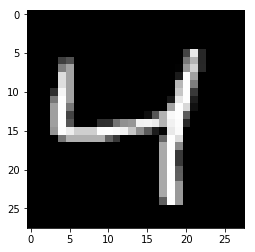

In [79]:
plt.imshow(x_train[2],cmap='gray')

In [61]:
x_train = x_train.reshape(x_train.shape[0],784)
x_test = x_test.reshape(x_test.shape[0], 784)
x_train.shape

(60000, 784)

In [92]:
x_train = x_train.reshape(x_train.shape[0],28*28)

In [93]:
x_test = x_test.reshape(x_test.shape[0],28*28)

In [80]:
x_train.astype("float32")
x_test.astype("float32")
x_train = x_train/255.
x_test = x_test/255.

In [81]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [94]:
model = Sequential()

In [95]:
input_layer = Dense(512,activation="relu",input_shape=(784,))
model.add(input_layer)
#model.add(Dropout(0.2))

In [96]:
hidden1 = Dense(512,activation="relu")
model.add(hidden1)
#model.add(Dropout(0.2))
hidden2 = Dense(num_classes,activation="softmax")
model.add(hidden2)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_35 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_36 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [97]:
#sgd = SGD()
model.compile(optimizer="SGD",loss='categorical_crossentropy',
             metrics=["accuracy"])

In [98]:
batch_size = 128
epochs = 20
model.fit(x_train,y_train,
          batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 61us/step - loss: 1.1016 - acc: 0.7582 - val_loss: 0.5269 - val_acc: 0.8780
Epoch 2/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.4511 - acc: 0.8840 - val_loss: 0.3699 - val_acc: 0.9028
Epoch 3/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.3589 - acc: 0.9012 - val_loss: 0.3173 - val_acc: 0.9129
Epoch 4/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.3177 - acc: 0.9114 - val_loss: 0.2919 - val_acc: 0.9190
Epoch 5/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.2916 - acc: 0.9176 - val_loss: 0.2694 - val_acc: 0.9246
Epoch 6/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.2717 - acc: 0.9242 - val_loss: 0.2547 - val_acc: 0.9282
Epoch 7/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.2555 - acc: 0.9288 - val_loss: 0.2430 - val_acc

In [17]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 54us/step


[0.15024098957851528, 0.95640000000000003]

In [99]:
model.predict(x_test[25].reshape(1,784))
#res = pred == max(pred)

array([[9.99953151e-01, 1.85973546e-12, 2.06627351e-06, 7.19933779e-10,
        1.18330824e-07, 2.32828725e-07, 4.27481100e-05, 2.12571538e-09,
        1.52847474e-06, 1.27207983e-07]], dtype=float32)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


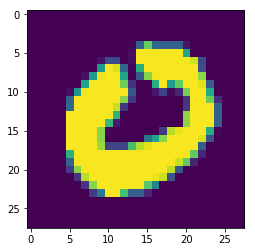

In [100]:

plt.imshow(x_test[25].reshape(28,28))
print (y_test[25])


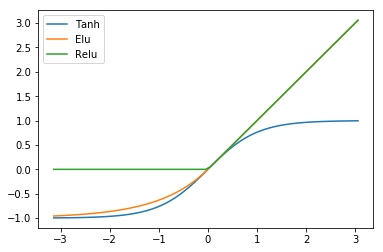

In [101]:
x = arange(-pi,pi,0.1)
def elu(x):
    if x>=0: return x
    return exp(x)-1
def relu(x):
    if x>=0 :return x
    return 0
plot(x,tanh(x),label='Tanh')
plot(x,[elu(y) for y in x],label='Elu')
plot(x,[relu(y) for y in x],label='Relu')
legend()